# PROBLEM SET 3

# Question 1






    Step 1. Import the necessary libraries
    Step 2. Import the dataset from the given address
    Step 3. Assign it to a variable called users

In [2]:
import pandas as pd
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


     Step 4

In [4]:
users.groupby('occupation').age.mean()


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

    Step 5

In [10]:
diff_gen = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

sums= diff_gen [['F', 'M']].sum(axis=1)
diff_gen['New column for male Ratio'] = round(100 * diff_gen['M'] / sums , 1)
x1 =diff_gen['New column for male Ratio']
x1.sort_values(ascending=False)

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: New column for male Ratio, dtype: float64

    Step 6

In [8]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


    Step 7

In [11]:
users.groupby(["occupation", "gender"])["age"].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

    Step 8

In [12]:
x = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
y = users.groupby(['occupation']).agg('count')
occup_gender = x.div(y, level = "occupation") * 100
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra


# Question 2

    Step 1
    Step 2
    Step 3
    Step 4

In [14]:
import numpy as np
import pandas as pd

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


    Step 5

In [15]:
euro12['Team'].count()

16

    Step 6

In [17]:
euro12.shape[1]

35

    Step 7

In [18]:
discipline = euro12[['Team','Yellow Cards', 'Red Cards']].copy()
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


    Step 8

In [19]:
print(discipline.sort_values(by=['Red Cards','Yellow Cards']))

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


    Step 9

In [20]:
euro12.groupby("Team")["Yellow Cards"].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

    Step 10

In [21]:
euro12[euro12["Goals"] > 6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

    Step 11

In [22]:
euro12[euro12["Team"].apply(lambda x: x.startswith("G"))]["Team"]

5    Germany
6     Greece
Name: Team, dtype: object

    Step 12

In [23]:
euro12.iloc[ : , : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


    Step 13

In [24]:
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


    Step 14

In [25]:
x = euro12.set_index('Team')
y = x.loc[['England','Italy','Russia'],['Shooting Accuracy']]
y

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


# Question 3

# Housing

    Step 1
    Step 2
    Step 3

In [35]:
import pandas as pd
import random

first = [[random.randint(1, 4)] for i in range(100)]
df1 = pd.DataFrame(first)

second = [[random.randint(1, 3)] for i in range(100)]
df2 = pd.DataFrame(second)

third = [[random.randint(10000, 30000)] for i in range(100)]
df3 = pd.DataFrame(third)

df = pd.concat([df1, df2 , df3], axis=1)
df

,0,0,0
0,4,2,19642
1,3,1,18620
2,4,2,16240
3,4,2,10753
4,2,2,13422
...,...,...,...
95,4,1,26604
96,1,2,27113
97,4,1,29183
98,1,1,20864


    Step 4

In [36]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,4,2,19642
1,3,1,18620
2,4,2,16240
3,4,2,10753
4,2,2,13422
...,...,...,...
95,4,1,26604
96,1,2,27113
97,4,1,29183
98,1,1,20864


    Step 5

In [37]:
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new 

0     4219642
1     3118620
2     4216240
3     4210753
4     2213422
       ...   
95    4126604
96    1227113
97    4129183
98    1120864
99    2126062
Name: bedrs, Length: 100, dtype: object

    Step 6 

In [38]:
df_new.index.size

100

    Step 7

In [39]:
df_new = df_new.reset_index(drop=True)
df_new

0     4219642
1     3118620
2     4216240
3     4210753
4     2213422
       ...   
95    4126604
96    1227113
97    4129183
98    1120864
99    2126062
Name: bedrs, Length: 100, dtype: object

# Question 4

# Wind Stats

    FROM Step 1 - Step 3

In [46]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+', parse_dates=[[0,1,2]])
data



,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


    Step 5

In [47]:
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


    Step 6


In [48]:
data.isnull().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

    Step 7

In [49]:
data.shape[0]-data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

    Step 8

In [50]:
Windspeedsmean= data.mean()
Windspeedsmean.mean()

10.227982360836924

    Step 9

In [51]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


    Step 10

In [52]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
2061-01-01,9.29,18.50,13.018182,2.808875
2061-01-02,6.50,17.54,11.336364,3.188994
2061-01-03,6.17,18.50,11.641818,3.681912
2061-01-04,1.79,11.75,6.619167,3.198126
2061-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


    Step 11

In [53]:
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
January_Winds=data.query('month==1')
January_Winds
January_Winds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

    Step 12

In [54]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01,1,2061,1
2062-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,2062-01-01,1,2062,1
2063-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,2063-01-01,1,2063,1
2064-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,2064-01-01,1,2064,1
2065-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,2065-01-01,1,2065,1
2066-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,2066-01-01,1,2066,1
2067-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,2067-01-01,1,2067,1
2068-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,2068-01-01,1,2068,1
2069-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,2069-01-01,1,2069,1


    Step 13

In [55]:
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01,1,2061,1
2061-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,2061-02-01,2,2061,1
2061-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,2061-03-01,3,2061,1
2061-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,2061-04-01,4,2061,1
2061-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,2061-05-01,5,2061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


    Step 14

In [56]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1970-12-28/1971-01-03,5.053333,2.316667,6.280000,0.670000,1.626667,0.596667,4.320000,0.360000,1.750000,1.263333,4.013333,9.040000,1.0,1971.0,2.0
1971-01-04/1971-01-10,20.667143,20.857143,18.852857,10.251429,17.375714,14.060000,15.542857,15.155714,14.082857,14.772857,24.628571,22.897143,1.0,1971.0,7.0
1971-01-11/1971-01-17,12.327143,11.584286,10.327143,4.435714,9.910000,6.744286,6.387143,7.095714,6.962857,6.635714,11.347143,13.082857,1.0,1971.0,14.0
1971-01-18/1971-01-24,18.381429,15.550000,14.310000,7.958571,14.201429,9.684286,13.255714,10.654286,11.462857,11.137143,16.227143,19.602857,1.0,1971.0,21.0
1971-01-25/1971-01-31,13.321429,10.351429,11.744286,5.251429,8.045714,3.620000,8.565714,3.918571,6.507143,5.294286,9.815714,12.994286,1.0,1971.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070-12-01/2070-12-07,13.845714,12.410000,11.631429,6.368571,13.011429,8.680000,11.737143,9.368571,11.088571,10.468571,16.641429,21.184286,12.0,2070.0,4.0
2070-12-08/2070-12-14,11.870000,8.447143,11.720000,4.150000,8.625714,5.311429,5.488571,5.547143,5.648571,4.168571,8.370000,12.934286,12.0,2070.0,11.0
2070-12-15/2070-12-21,11.605714,9.981429,12.400000,5.404286,9.630000,7.090000,8.308571,7.442857,8.232857,8.930000,12.392857,18.548571,12.0,2070.0,18.0


    Step 15

In [57]:
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1971-01-10  15.21  28.21  20.667143  4.752914  13.50  25.75  20.857143   
1971-01-17   6.63  18.25  12.327143  4.407334   6.34  19.04  11.584286   
1971-01-24  12.92  24.87  18.381429  4.314446  11.96  20.17  15.550000   
1971-01-31   7.04  19.29  13.321429  4.422961   2.83  17.25  10.351429   
1971-02-07   2.71  12.58   7.802857  3.939161   1.17   6.96   3.328571   
1971-02-14   9.25  25.33  16.041429  6.040365   1.38  22.46  13.910000   
1971-02-21   9.21  21.79  14.541429  4.498616   5.83  17.58  12.641429   
1971-02-28   5.54  11.96   8.512857  2.169368   3.00  12.21   9.148571   
1971-03-07   5.04  13.50   8.698571  3.029392   3.50  11.83   6.762857   
1971-03-14   6.29  11.67   8.695714  1.958536   1.50  11.83   4.567143   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1971-01-10  3.884215  14.54  23.58  ...  14.772857  5.698911  11.92  38.20   
1971-01-17  4.206126   4.38  17.16  ...   6.635714  4.033807   6.21  17.08   
1971-01-24  2.995563  10.71  18.66  ...  11.137143  4.607818   7.58  22.13   
1971-01-31  4.913995   6.79  25.29  ...   5.294286  4.086171   2.75  18.38   
1971-02-07  2.454577   3.88  20.83  ...   4.190000  2.666727   3.79  14.92   
1971-02-14  7.980624   8.29  22.67  ...  13.018571  4.303973   6.50  27.16   
1971-02-21  3.920699   7.83  15.16  ...   9.851429  3.189056   9.13  22.92   
1971-02-28  3.099927   5.09   9.62  ...   4.274286  2.511672   5.13  16.46   
1971-03-07  3.237395   6.21  16.00  ...   5.704286  3.156025   3.29  15.37   
1971-03-14  3.473930   5.21  13.83  ...   5.914286  3.762366   4.67  17.50   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1971-01-10  24.628571  8.605476  10.29  32.91  22.897143  6.993005  
1971-01-17  11.347143  3.643980   8.04  21.37  13.082857  4.815927  
1971-01-24  16.227143  4.605503  13.54  25.04  19.602857  4.278741  
1971-01-31   9.815714  5.320513   5.83  26.00  12.994286  6.776230  
1971-02-07   6.828571  3.814680   6.46  21.34  12.012857  5.189944  
1971-02-14  19.580000  7.247650  12.71  29.50  21.784286  6.389796  
1971-02-21  14.341429  5.111984  12.67  23.25  17.251429  4.317516  
1971-02-28  10.785714  4.340998   7.21  18.54  12.404286  4.117264  
1971-03-07   8.618571  4.197144   7.00  20.25  13.538571  4.530046  
1971-03-14   9.697143  4.826823   9.13  22.17  14.482857  4.429784  

[10 rows x 48 columns]

# Question  5



Step 1,2,3,4

In [58]:
import pandas as pd
import numpy as np

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


    Step 5

In [59]:
chipo.shape[0]

4622

    Step 6

In [64]:
chipo.shape[1]

5

    Step 7

In [60]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

    Step 8

In [61]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9

In [62]:
item = chipo.groupby('item_name')
item = item.sum()
item = item.sort_values(['quantity'], ascending=False)
item.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [63]:
item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


    Step 10

In [65]:
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


    Step 11

In [66]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


    Step 12

In [67]:
chipo.quantity.sum()

4972

    Step 13

In [75]:
chipo.item_price.dtype

dtype('float64')

    Step 14

In [76]:
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


    Step 15

In [77]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

    Step 17

In [78]:
chipo.item_name.value_counts().count()


50

# Reference- https://www.w3schools.com/python/

# Question 6

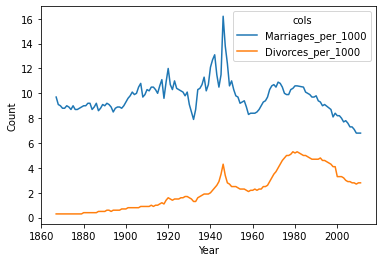

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pan = pd.read_csv('us-marriages-divorces-1867-2014.csv')
x1 = pan[["Year", "Marriages_per_1000", "Divorces_per_1000"]]
x2 = x1.melt('Year', var_name='cols',  value_name='Count')
sns.lineplot(x="Year", y="Count", hue='cols', data=x2)
plt.show()

# Question 7

([<matplotlib.axis.XTick at 0x15c14d3e3d0>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

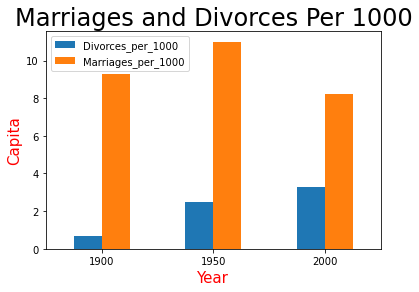

In [96]:
pan = pd.read_csv('us-marriages-divorces-1867-2014.csv')
newpan = pan.loc[data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
newpan

newpan[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'Black', fontsize = 24)
plt.xlabel('Year', color = 'Red', fontsize = 15)
plt.ylabel('Capita', color = 'Red', fontsize = 15)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

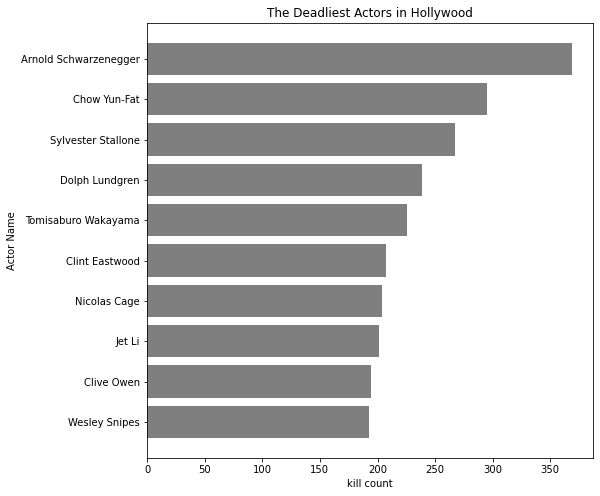

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('actor_kill_counts.csv')
data.sort_values(by=['Count'], inplace=True)
data_actor = data['Actor']
data_count = data['Count']
plt.rcParams["figure.figsize"] = (8, 8)
plt.barh(data_actor, data_count, align='center', alpha=0.5, color = 'Black')
colours = ['#008080', '#5f9ea0', '#20b2aa', '#5f8ea0', '#43b5ae', '#2f837c', '#31753', '#367588', '#43b3ae', '#40e0d0']
plt.xlabel('kill count')
plt.ylabel('Actor Name')
plt.title('The Deadliest Actors in Hollywood')
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

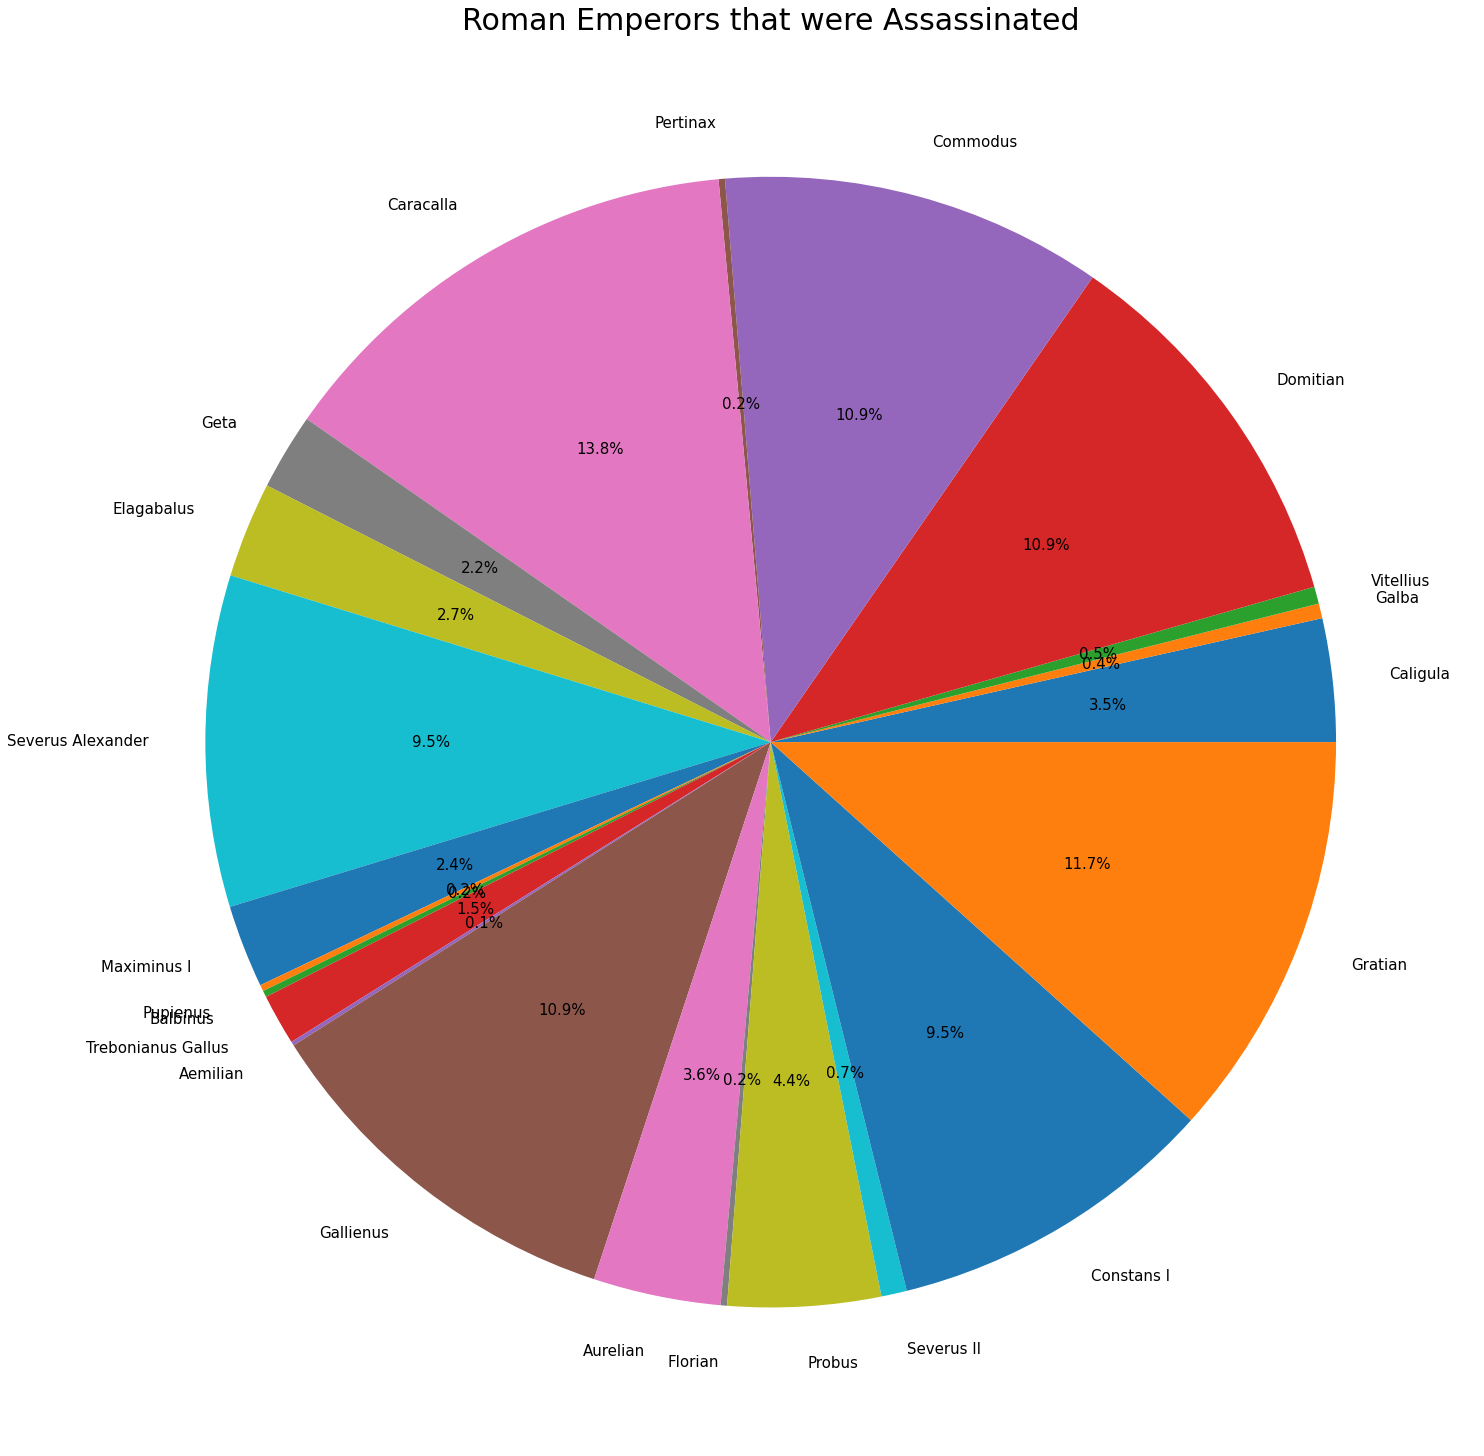

In [12]:
##Reference- https://www.w3schools.com/python/


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('roman-emperor-reigns.csv')
data_cause=pd.DataFrame(data.loc[(data['Cause_of_Death'] == "Assassinated")])
labels = data_cause['Emperor']

fig, ax = plt.subplots()
ax.pie(data_cause["Length_of_Reign"],labels=labels,autopct='%1.1f%%',textprops={'fontsize': 15})
fig = plt.gcf()
fig.set_size_inches(30,26) 
plt.title('Roman Emperors that were Assassinated',fontsize=30)
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

Text(0, 0.5, 'CS Doctorates Awarded')

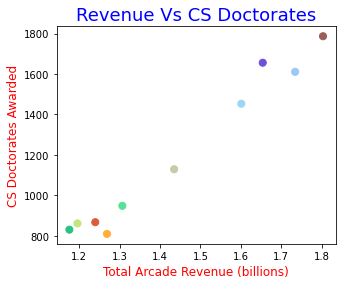

In [47]:
# Reference:- https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

data.plot.scatter(x='Total Arcade Revenue (billions)',

y='Computer Science Doctorates Awarded (US)', c=colours , s = 50, figsize = (5,4))

plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Red', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Red', fontsize = 12)
